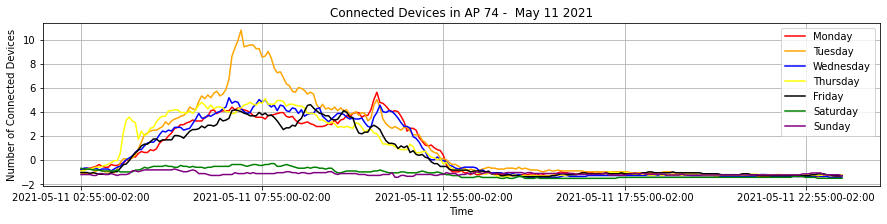

CSV files generated for each week in ./save folder.


In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, AutoLocator 
import matplotlib.dates as md


n_his = 24
n_pred = 12

col = pd.read_csv('./dataset/col_ap.csv', header=None).values.flatten()

specific_date = datetime.datetime(2021, 5, 11)

num_timesteps = 253
time_diff = datetime.timedelta(minutes=5)  # Assuming each timestep is 5 minutes
specific_date = datetime.datetime(2021, 5, 11, 2, 55, tzinfo=datetime.timezone(datetime.timedelta(hours=-2)))

timestamps = [specific_date + i * time_diff for i in range(num_timesteps)]

idx = pd.date_range(start=(specific_date), end=(specific_date + datetime.timedelta(days=1)), freq='5min').values[(n_his + n_pred -1):-1]
idx = pd.DatetimeIndex(data=idx, tz='Etc/GMT+2')

# Function to read and process data for a specific week
def process_week_data(week_num):
  filename = f"./save/week_{week_num}.csv"  # Construct filename with week number
  seasonal = pd.read_csv('./dataset/seasonal_week.csv', header=None).values
  start_index = week_num * 288
  end_index = (week_num + 1) * 288
  data_to_process = seasonal[start_index:end_index][(n_his + n_pred - 1):]
  df_seasonal = pd.DataFrame(data_to_process, index=idx, columns=col)
  df_seasonal.insert(0, 'Timesteps', timestamps)
  df_seasonal.to_csv(filename, index=False)  # Save data to CSV without index


# Loop through week numbers 0 to 6
for week_num in range(7):
  process_week_data(week_num)


df_week0 = pd.read_csv('./save/week_0.csv', index_col=0)
df_week1 = pd.read_csv('./save/week_1.csv', index_col=0)
df_week2 = pd.read_csv('./save/week_2.csv', index_col=0)
df_week3 = pd.read_csv('./save/week_3.csv', index_col=0)
df_week4 = pd.read_csv('./save/week_4.csv', index_col=0)
df_week5 = pd.read_csv('./save/week_5.csv', index_col=0)
df_week6 = pd.read_csv('./save/week_6.csv', index_col=0)

column_name = "AP 74"

plt.figure(figsize=(15, 3))  # Set figure width to 10 and height to 6
plt.plot(df_week0[column_name], label='Monday' , color="red")
plt.plot(df_week1[column_name], label='Tuesday' , color="orange")
plt.plot(df_week2[column_name], label='Wednesday' , color="blue")
plt.plot(df_week3[column_name], label='Thursday' , color="yellow")
plt.plot(df_week4[column_name], label='Friday' , color="black")
plt.plot(df_week5[column_name], label='Saturday' , color="green")
plt.plot(df_week6[column_name], label='Sunday' , color="purple")

ax = plt.gca()  # Get the current axes object
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust 'n' for desired number of ticks
# ax.xaxis.set_major_formatter(md.DateFormatter('%m:%d'))
# ax.xaxis.set_major_formatter(md.DateFormatter('%m-%d %H:%M'))

plt.xlabel('Time')
plt.ylabel('Number of Connected Devices')
plt.legend()
plt.grid(True)
plt.title(f'Connected Devices in {column_name} -  May 11 2021')
plt.show()

print("CSV files generated for each week in ./save folder.")
